In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    # path = 'D:\Traffic sign classification\Train\\'+str(i)
    print(path)
    # break
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

d:\Traffic sign classification\Train\0
d:\Traffic sign classification\Train\1
d:\Traffic sign classification\Train\2
d:\Traffic sign classification\Train\3
d:\Traffic sign classification\Train\4
d:\Traffic sign classification\Train\5
d:\Traffic sign classification\Train\6
d:\Traffic sign classification\Train\7
d:\Traffic sign classification\Train\8
d:\Traffic sign classification\Train\9
d:\Traffic sign classification\Train\10
d:\Traffic sign classification\Train\11
d:\Traffic sign classification\Train\12
d:\Traffic sign classification\Train\13
d:\Traffic sign classification\Train\14
d:\Traffic sign classification\Train\15
d:\Traffic sign classification\Train\16
d:\Traffic sign classification\Train\17
d:\Traffic sign classification\Train\18
d:\Traffic sign classification\Train\19
d:\Traffic sign classification\Train\20
d:\Traffic sign classification\Train\21
d:\Traffic sign classification\Train\22
d:\Traffic sign classification\Train\23
d:\Traffic sign classification\Train\24
d:\Traffic

In [3]:
print(data.shape, labels.shape)

(39208, 30, 30, 3) (39208,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31366, 30, 30, 3) (7842, 30, 30, 3) (31366,) (7842,)


In [5]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 59s 59ms/step - loss: 2.3906 - accuracy: 0.4067 - val_loss: 0.8752 - val_accuracy: 0.7621
Epoch 2/15
981/981 [==============================] - 73s 75ms/step - loss: 1.0902 - accuracy: 0.6733 - val_loss: 0.4671 - val_accuracy: 0.8683
Epoch 3/15
981/981 [==============================] - 142s 145ms/step - loss: 0.7343 - accuracy: 0.7755 - val_loss: 0.3670 - val_accuracy: 0.8922
Epoch 4/15
981/981 [==============================] - 166s 169ms/step - loss: 0.5445 - accuracy: 0.8341 - val_loss: 0.2366 - val_accuracy: 0.9337
Epoch 5/15
981/981 [==============================] - 105s 107ms/step - loss: 0.4582 - accuracy: 0.8614 - val_loss: 0.1792 - val_accuracy: 0.9470
Epoch 6/15
981/981 [==============================] - 114s 116ms/step - loss: 0.3861 - accuracy: 0.8856 - val_loss: 0.1357 - val_accuracy: 0.9621
Epoch 7/15
981/981 [==============================] - 104s 106ms/step - loss: 0.3397 - accuracy: 0.8989 - val_loss: 0.0964 - val

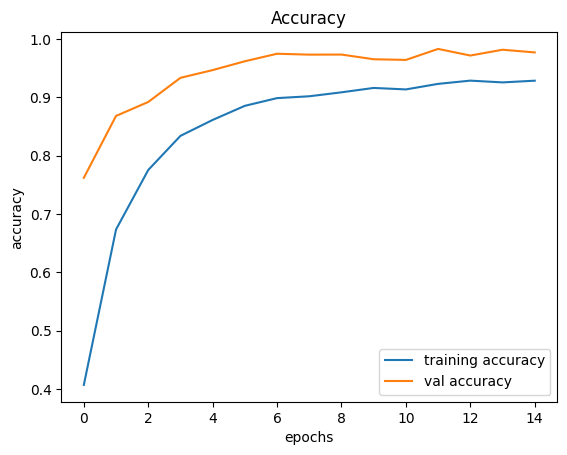

In [8]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

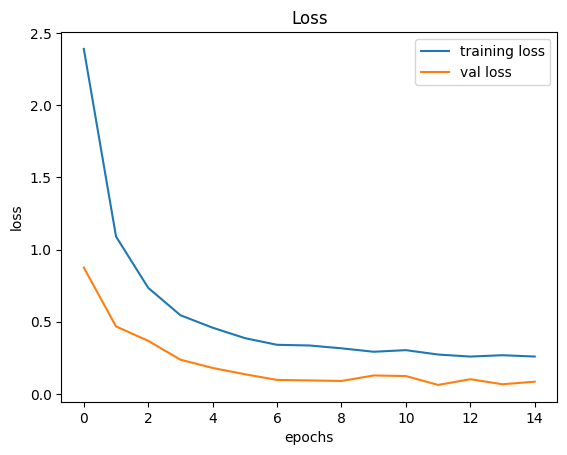

In [9]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [11]:
predict_x=model.predict(X_test)
pred=np.argmax(predict_x,axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


395/395 [==============================] - 6s 15ms/step
0.9416468725257324


In [12]:
model.save('traffic_classifier.h5')

In [13]:
import numpy as np
from keras.preprocessing import image
st = "D:\Traffic sign classification\Test" + "\\"+ "00005.png"
# st.replace("\\","\")
image = Image.open(st)
image = image.resize((30,30))
image = np.array(image)
image = np.expand_dims(image, axis = 0)
predict_result=model.predict(image)
result = np.argmax(predict_result,axis=1)
result = result[0]


1/1 [==============================] - 0s 29ms/step


In [14]:
classes = [ 'Speed limit (20km/h)',
            'Speed limit (30km/h)',
            'Speed limit (50km/h)',
            'Speed limit (60km/h)',
            'Speed limit (70km/h)',
            'Speed limit (80km/h)',
            'End of speed limit (80km/h)',
            'Speed limit (100km/h)',
            'Speed limit (120km/h)',
            'No passing',
            'No passing veh over 3.5 tons',
            'Right-of-way at intersection',
            'Priority road',
            'Yield',
            'Stop',
            'No vehicles',
            'Veh > 3.5 tons prohibited',
            'No entry',
            'General caution',
            'Dangerous curve left',
            'Dangerous curve right',
            'Double curve',
            'Bumpy road',
            'Slippery road',
            'Road narrows on the right',
            'Road work',
            'Traffic signals',
            'Pedestrians',
            'Children crossing',
            'Bicycles crossing',
            'Beware of ice/snow',
            'Wild animals crossing',
            'End speed + passing limits',
            'Turn right ahead',
            'Turn left ahead',
            'Ahead only',
            'Go straight or right',
            'Go straight or left',
            'Keep right',
            'Keep left',
            'Roundabout mandatory',
            'End of no passing',
            'End no passing veh > 3.5 tons']

In [15]:
classes[result]

'Keep right'